연령별 인구 데이터

In [3]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 일단 있으니까
import re   # 정규식

In [49]:
f = open('../data/age.csv', encoding='euc_kr')
data = csv.reader(f)
header = next(data)

print('-------------------------------------')
print('age.csv index')
print('-------------------------------------')
for i in range(len(header)):
    print(f"[{i:3}]: {header[i]}")
    
f.close()

-------------------------------------
age.csv index
-------------------------------------
[  0]: 행정구역
[  1]: 2024년06월_계_총인구수
[  2]: 2024년06월_계_연령구간인구수
[  3]: 2024년06월_계_0세
[  4]: 2024년06월_계_1세
[  5]: 2024년06월_계_2세
[  6]: 2024년06월_계_3세
[  7]: 2024년06월_계_4세
[  8]: 2024년06월_계_5세
[  9]: 2024년06월_계_6세
[ 10]: 2024년06월_계_7세
[ 11]: 2024년06월_계_8세
[ 12]: 2024년06월_계_9세
[ 13]: 2024년06월_계_10세
[ 14]: 2024년06월_계_11세
[ 15]: 2024년06월_계_12세
[ 16]: 2024년06월_계_13세
[ 17]: 2024년06월_계_14세
[ 18]: 2024년06월_계_15세
[ 19]: 2024년06월_계_16세
[ 20]: 2024년06월_계_17세
[ 21]: 2024년06월_계_18세
[ 22]: 2024년06월_계_19세
[ 23]: 2024년06월_계_20세
[ 24]: 2024년06월_계_21세
[ 25]: 2024년06월_계_22세
[ 26]: 2024년06월_계_23세
[ 27]: 2024년06월_계_24세
[ 28]: 2024년06월_계_25세
[ 29]: 2024년06월_계_26세
[ 30]: 2024년06월_계_27세
[ 31]: 2024년06월_계_28세
[ 32]: 2024년06월_계_29세
[ 33]: 2024년06월_계_30세
[ 34]: 2024년06월_계_31세
[ 35]: 2024년06월_계_32세
[ 36]: 2024년06월_계_33세
[ 37]: 2024년06월_계_34세
[ 38]: 2024년06월_계_35세
[ 39]: 2024년06월_계_36세
[ 40]: 2024년06월_계_37세
[ 41]: 2024년06월_계_38세
[

In [50]:
# 대구 산격동 인구 현황
f = open('../data/age.csv', encoding='euc_kr')
data = csv.reader(f)
header = next(data)

# row[0]: 행정구역
for row in data:
    if '산격3동' in row[0]:
        print(row)

f.close()

['대구광역시 북구 산격3동(2723063000)', '8,493', '8,493', '16', '11', '9', '6', '13', '20', '20', '20', '24', '27', '17', '27', '24', '31', '34', '29', '33', '32', '45', '122', '168', '215', '283', '325', '363', '306', '223', '231', '199', '206', '153', '148', '143', '125', '107', '89', '65', '65', '64', '66', '59', '70', '90', '73', '112', '96', '57', '89', '82', '107', '103', '101', '98', '93', '117', '107', '99', '117', '110', '106', '101', '134', '123', '156', '145', '120', '118', '108', '122', '114', '97', '103', '104', '77', '84', '93', '81', '76', '38', '67', '49', '61', '46', '48', '49', '30', '34', '28', '29', '15', '13', '7', '8', '8', '6', '7', '1', '1', '0', '2', '0']


[16, 11, 9, 6, 13, 20, 20, 20, 24, 27, 17, 27, 24, 31, 34, 29, 33, 32, 45, 122, 168, 215, 283, 325, 363, 306, 223, 231, 199, 206, 153, 148, 143, 125, 107, 89, 65, 65, 64, 66, 59, 70, 90, 73, 112, 96, 57, 89, 82, 107, 103, 101, 98, 93, 117, 107, 99, 117, 110, 106, 101, 134, 123, 156, 145, 120, 118, 108, 122, 114, 97, 103, 104, 77, 84, 93, 81, 76, 38, 67, 49, 61, 46, 48, 49, 30, 34, 28, 29, 15, 13, 7, 8, 8, 6, 7, 1, 1, 0, 2, 0]


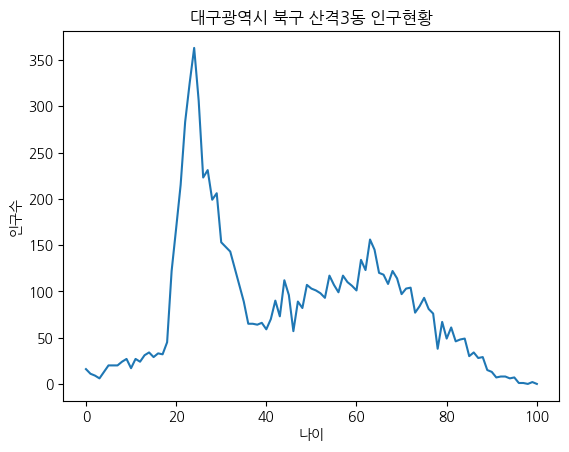

In [51]:
# 북구 산격3동의 인구 분포 그래프 그리기

f = open('../data/age.csv', encoding='euc_kr')
data = csv.reader(f)
result = []
city = ''

for row in data:
    if '산격3동' in row[0]:
        str_list = re.split('[()]', row[0])
        city = str_list[0]
        for data in row[3:]:
            data = data.replace(',', '')
            result.append(int(data))

f.close()
print(result)

plt.title(f"{city} 인구현황")
plt.xlabel('나이')
plt.ylabel('인구수')
plt.plot(result)
plt.show()

In [52]:
temp_string = '1:2,3:456/789'

print(temp_string.split(':,'))  # (;,)을 단일 구분자로 취급
print(len(temp_string.split(':,')))
print(temp_string.split(','))
print(len(temp_string.split(',')))

city = '대구광역시 북구 산격3동(2723063000) '
print(city.split('('))

['1:2,3:456/789']
1
['1:2', '3:456/789']
2
['대구광역시 북구 산격3동', '2723063000) ']


In [53]:
# xtitcks
import numpy as np

In [54]:
def parse_district_name(city):
    '''
    행정구역 명칭에서 숫자부분 제거
    '''
    
    city_name = re.split('[()]', city)
    return city_name[0]

In [55]:
def print_populatuon(popultion):
    '''
    특정 지역의 인구 현황을 화면에 출력
    '''
    
    for i in range(len(popultion)):
        print(f"{i:3d}세: {popultion[i]:8d}명", end=' ')
        if (i+1)%10 == 0:
            print()

In [56]:
def draw_population(city_name, population_list):
    '''
    특정 지역에 대한 인구 분포를 그래프로 나타냄(plot)
    - city_name: 지역이름
    - population_list: 0~100세 이상까지 인구수 리스트
    '''
    
    plt.title(f"{city_name} 인구 현황")
    plt.xlabel('나이')
    plt.ylabel('인구수')
    plt.bar(range(101), population_list)
    plt.xticks(np.arange(0, 101, 10), range(0, 101, 10))
    plt.show()

In [57]:
def get_populatuon(city):
    f = open('../data/age.csv', encoding='euc_kr')
    data = csv.reader(f)
    next(data)
    
    population_list = []
    full_district_name = ''
    for row in data:
        if city in row[0]:
            full_district_name = parse_district_name(row[0])
            for data in row[3:]:
                data = data.replace(',', '')
                population_list.append(int(data))
            break   # 위치에 따라 그래프가 안그려지기도함
    f.close()
    
    print_populatuon(population_list)
    draw_population(full_district_name, population_list)

  0세:     9364명   1세:    10248명   2세:    11229명   3세:    11727명   4세:    13305명   5세:    14489명   6세:    16260명   7세:    18339명   8세:    20221명   9세:    20723명 
 10세:    20333명  11세:    21573명  12세:    22097명  13세:    22226명  14세:    20427명  15세:    20716명  16세:    22498명  17세:    21258명  18세:    20517명  19세:    21033명 
 20세:    23147명  21세:    23472명  22세:    24752명  23세:    28360명  24세:    29458명  25세:    27334명  26세:    28733명  27세:    29297명  28세:    30006명  29세:    29643명 
 30세:    30154명  31세:    30709명  32세:    30927명  33세:    27876명  34세:    28198명  35세:    26780명  36세:    25669명  37세:    26527명  38세:    27365명  39세:    26982명 
 40세:    29990명  41세:    33712명  42세:    36491명  43세:    37327명  44세:    37154명  45세:    34159명  46세:    33650명  47세:    34620명  48세:    35136명  49세:    37648명 
 50세:    40838명  51세:    42017명  52세:    42382명  53세:    43551명  54세:    43311명  55세:    44959명  56세:    42224명  57세:    40340명  58세:    40118명  59세:    39971명 
 60세:    36646명  61세:    41943명  6

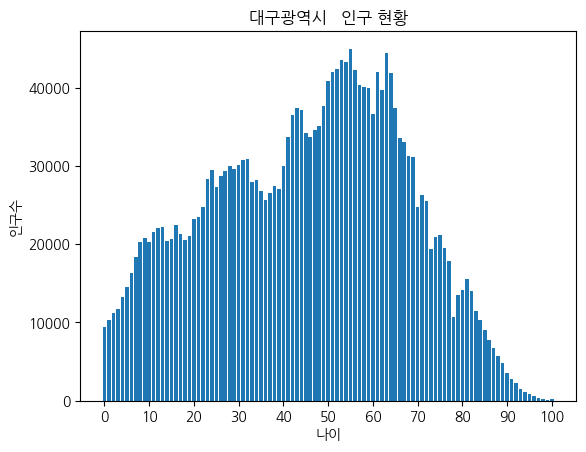

In [58]:
city = input("인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: ")
get_populatuon(city)        # 대구 만 입력하면 해운대구 나옴, 젤 먼저 발견되기 때문

In [59]:
def draw_piechart(city_name, city_population, voting_population):
    '''
    전체 인구수 대비 투표 가능 인구의 파이차트 작성
    '''
    
    non_voting_population = city_population - voting_population
    population = [non_voting_population, voting_population]
    color = ['tomato', 'royalblue']
    
    plt.pie(population, labels=['18세 미만', '투표가능인구'], autopct='%.1f%%', colors=color, startangle=90)
    plt.legend()
    plt.title(city_name + ' 투표 가능 인구 비율')
    plt.show()

In [60]:
def get_voting_population(city):
    f = open('../data/age.csv', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data)
    
    city_name = ''
    city_population = 0
    voting_population = 0
    
    for row in data:
        if city in row[0]:
            city_population = row[1]
            city_population = city_population.replace(',', '')
            city_population = int(city_population)
            city_name = parse_district_name(row[0])
            
            for data in row[21:]:
                data = data.replace(',','')
                voting_num = int(data)
                voting_population += voting_num
            break
    f.close()
    
    print(f"{city_name}전체 인구수: {city_population:,}명, 투표 가능 인구수: {voting_population:,}명")
    draw_piechart(city_name, city_population, voting_population)

대구광역시  전체 인구수: 2,367,183명, 투표 가능 인구수: 2,050,150명


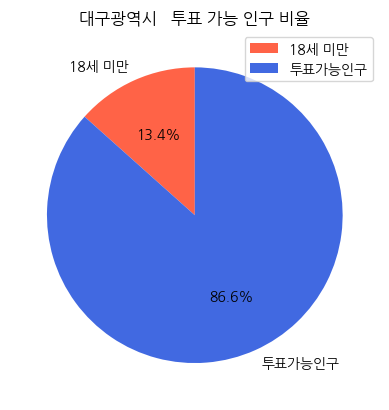

In [61]:
city = input("투표 가능 인구수를 확인할 도시이름을 입력하시요: ")
get_voting_population(city)

In [4]:
def draw_pie_chart(city, population_list, label_list):
    plt.pie(population_list, labels=label_list, autopct='%.1f%%',
            startangle=90, colors=plt.cm.Pastel2.colors, textprops={'fontsize':8})
    plt.legend()
    plt.title(city + ' 학령인구 비율')
    plt.show()

In [5]:
def draw_donut_chart(city, population_list, label_list):
    plt.pie(population_list, labels=label_list, autopct='%.1f%%',
            startangle=90, colors=plt.cm.Pastel1.colors, pctdistance=0.85, textprops={'fontsize':6})
    center_circle = plt.Circle((0,0), 0.7, facecolor='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.legend()
    plt.title(city + ' 학령인구 비율')
    plt.show()

In [6]:
def get_populatuon(row, start, end):
    population = 0
    for num in row[start:end+1]:
        num = num.replace(',', '')
        num = int(num)
        population += num
    return population

In [9]:
def school_age_population(city):
    city_population = 0
    non_school_pop = 0
    school_age_pop = 0
    
    label_list = ['초등학생', '중학생', '고등학생', '대학생', '비학령인구']
    population_list = []
    
    f = open('../data/age.csv', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data)
    
    for row in data:
        for city in row[0]:
            city_population = row[1]
            city_population = city_population.replace(',','')
            city_population = int(city_population)
            
            elementary_pop = get_populatuon(row, 9, 14)
            population_list.append(elementary_pop)
            
            middleschool_pop = get_populatuon(row, 15, 17)
            population_list.append(middleschool_pop)
            
            highschool_pop = get_populatuon(row, 18, 20)
            population_list.append(highschool_pop)
            
            university_pop = get_populatuon(row, 21, 24)
            population_list.append(university_pop)
            
            school_age_pop = (elementary_pop + middleschool_pop + highschool_pop + university_pop)
            non_school_pop = city_population - school_age_pop
            population_list.append(non_school_pop)
            
            break
    f.close()
    
    school_age_pop_rate = round(((school_age_pop*100) / city_population), 1)
    print(f"전체 인구수: {city_population:,},",
          f"학령 인수구: {school_age_pop:,}, ",
          f"학령 인구 비율: {school_age_pop_rate}%")
    
    draw_pie_chart(city, population_list, label_list)
    draw_donut_chart(city, population_list, label_list)

전체 인구수: 3,830, 학령 인수구: 408,  학령 인구 비율: 10.7%


ValueError: 'label' must be of length 'x'

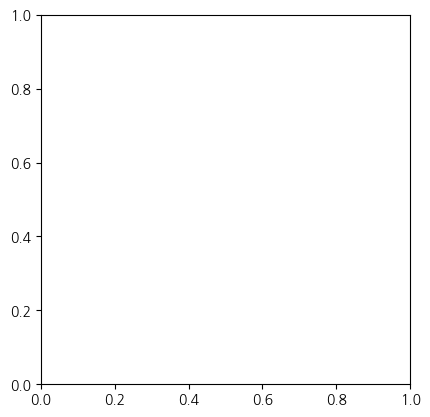

In [10]:
# city = input("학령인구를 분석할 도시 이름: ")
city = '서울특별시'
school_age_population(city)
# 도저히 뭐가 에러 났는지 모르겠음. 그래서 파이썬 파일을 만들어볼것임